In [406]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE

CLR=np.array([[0., 0.2, 0.8], (0.8, 0.2, 0.),(0.1, 0.6, 0.1),(0.9, 0.5, 0.1),(0.5, 0., 0.7),(0.3, 0.3, 0.3),(0., 0.6, 0.6),(0.9, 0.3, 0.3),(0.2, 0.9, 0.3),(0.3, 0.9, 0.9)])
np.random.seed(0)

## MNIST digit recognition

In [407]:
y_all=np.load('MNIST_labels.npy')
TOT=len(y_all)
X_all=np.load('MNIST_inputs.npy').reshape(TOT,28**2)

In [408]:
NUM_CLASS=4
X_all=X_all[y_all<NUM_CLASS]
y_all=y_all[y_all<NUM_CLASS]
X_all=X_all-np.mean(X_all)
TOT=len(y_all)

In [409]:
# Train: First N examples out of 60k total
N=int(0.01*TOT)
X_train=np.zeros((N,28**2))
y_train=np.zeros((N))
for i in range(N):
    X_train[i]=X_all[i]
    y_train[i]=y_all[i]

# TEST: Last 10k examples out of 60k total
T=int(0.01*TOT)
X_test=np.zeros((T,28**2))
y_test=np.zeros((T))
for i in range(T):
    X_test[i]=X_all[i+TOT-T]
    y_test[i]=y_all[i+TOT-T]

In [410]:
clf = KNeighborsClassifier(3)
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)
score = clf.score(X_test, y_test)
print(score)

0.951417004048583


## TSNE Visualization of the test dataset

In [411]:
#X_tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X_test)
X_data = np.concatenate([X_train,X_test])
X_tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X_data)
X_train_tsne = X_tsne[:len(X_train)]
X_test_tsne = X_tsne[len(X_train):]

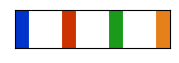

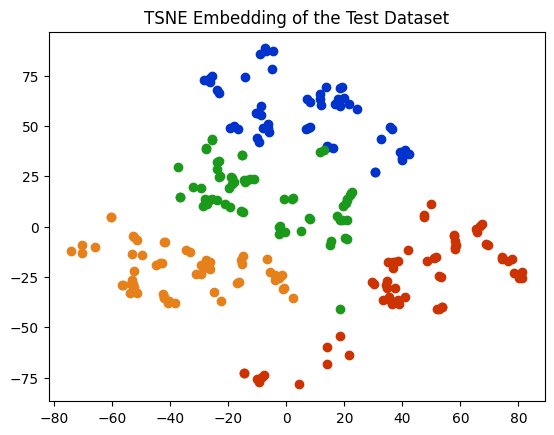

In [412]:
plt.figure(figsize=(2,0.5))
for i in range(NUM_CLASS):
    plt.plot([i,i],[0,1],color=CLR[i],linewidth=10)
plt.xticks([]); plt.yticks([])

plt.figure()
plt.title('TSNE Embedding of the Test Dataset')
for i in range(NUM_CLASS):
    plt.scatter(X_test_tsne[y_test==i,0],X_test_tsne[y_test==i,1],color=CLR[i])

Digit: 0 % of mistakes: 0.08620689655172414
Digit: 1 % of mistakes: 0.0
Digit: 2 % of mistakes: 0.07692307692307693
Digit: 3 % of mistakes: 0.03389830508474576


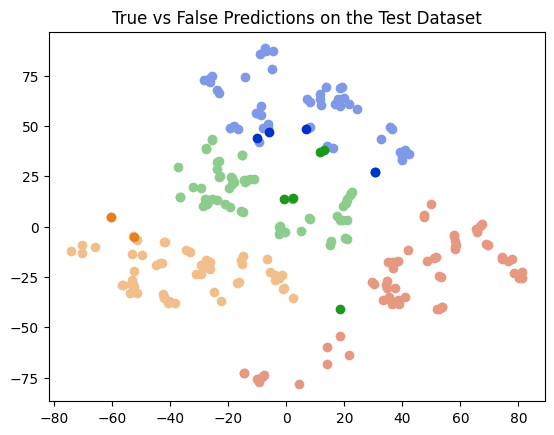

In [413]:
plt.title('True vs False Predictions on the Test Dataset')
for i in range(NUM_CLASS):
    ix_true=(y_test==i) & (y_test==y_predict)
    plt.scatter(X_test_tsne[ix_true,0],X_test_tsne[ix_true,1],color=(1+CLR[i])/2)
for i in range(NUM_CLASS):
    ix_false=(y_test==i) & (y_test!=y_predict)
    print('Digit:', i,'% of mistakes:', np.sum(ix_false)/np.sum(y_test==i))
    plt.scatter(X_test_tsne[ix_false,0],X_test_tsne[ix_false,1],color=CLR[i])

## TSNE visualization of mistakes on training data

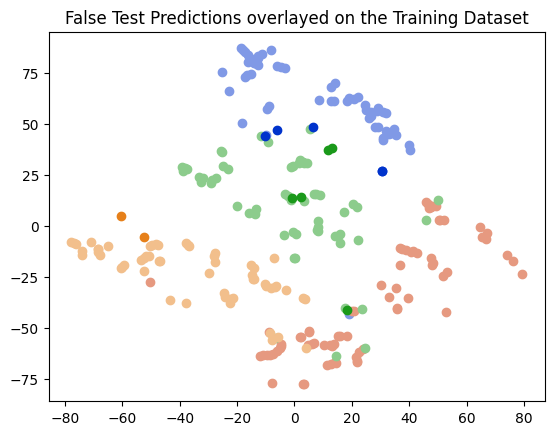

In [414]:
plt.title('False Test Predictions overlayed on the Training Dataset')
for i in range(NUM_CLASS):
    plt.scatter(X_train_tsne[y_train==i,0],X_train_tsne[y_train==i,1],color=(1+CLR[i])/2)
for i in range(NUM_CLASS):
    ix_false=(y_test==i) & (y_test!=y_predict)
    plt.scatter(X_test_tsne[ix_false,0],X_test_tsne[ix_false,1],color=CLR[i])

In [415]:
X_train_tsne[y_train==i][:,0]

array([-68.5782   , -37.888256 ,  -6.6441197, -67.92667  ,   2.9776099,
       -14.128917 , -43.497105 , -22.555103 , -14.189221 ,  -5.836828 ,
       -14.537172 , -47.52097  , -74.090385 , -15.011163 , -49.665203 ,
       -10.352281 , -29.902687 , -48.178356 , -74.189354 , -76.755714 ,
        -9.828292 , -76.277275 , -77.743614 , -52.393475 ,  -8.505227 ,
       -51.64397  , -53.337337 ,   3.825539 , -24.093958 , -50.346428 ,
       -68.37022  , -59.3686   , -46.97072  ,  -6.2742743, -50.85693  ,
       -47.37824  , -21.426867 , -60.289604 , -14.723439 , -68.43321  ,
        -8.320523 , -60.026073 , -65.13922  , -52.29923  , -27.799324 ,
        -6.9516053, -27.775967 ,  -2.7996407, -24.680449 , -27.886244 ,
        -7.8437614, -70.92121  ,   4.0150027, -22.61469  , -36.677715 ,
       -37.04453  , -37.91152  ], dtype=float32)

## PCA embedding

In [416]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_data)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

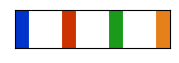

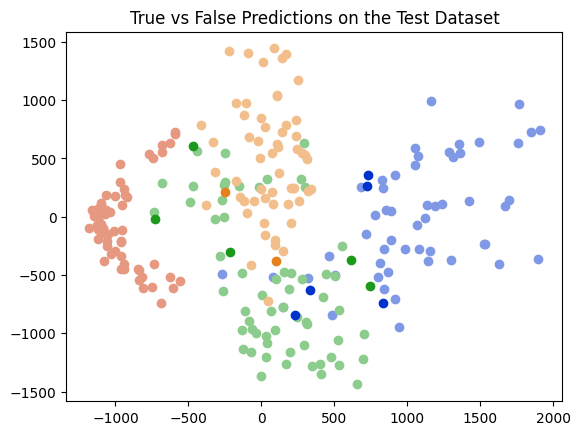

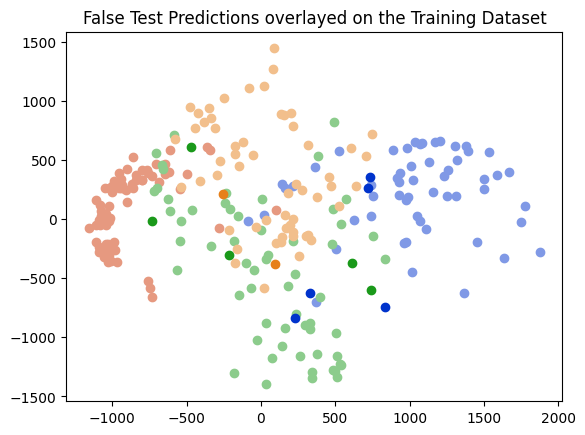

In [417]:
plt.figure(figsize=(2,0.5))
for i in range(NUM_CLASS):
    plt.plot([i,i],[0,1],color=CLR[i],linewidth=10)
plt.xticks([]); plt.yticks([])

plt.figure()
plt.title('True vs False Predictions on the Test Dataset')
for i in range(NUM_CLASS):
    ix_true=(y_test==i) & (y_test==y_predict)
    plt.scatter(X_test_pca[ix_true,0],X_test_pca[ix_true,1],color=(1+CLR[i])/2)
for i in range(NUM_CLASS):
    ix_false=(y_test==i) & (y_test!=y_predict)
    plt.scatter(X_test_pca[ix_false,0],X_test_pca[ix_false,1],color=CLR[i])

plt.figure()
plt.title('False Test Predictions overlayed on the Training Dataset')
for i in range(NUM_CLASS):
    plt.scatter(X_train_pca[y_train==i,0],X_train_pca[y_train==i,1],color=(1+CLR[i])/2)
for i in range(NUM_CLASS):
    ix_false=(y_test==i) & (y_test!=y_predict)
    plt.scatter(X_test_pca[ix_false,0],X_test_pca[ix_false,1],color=CLR[i])